# Data Exploration and Word Clouds

In [114]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from tqdm import tqdm
import os
import nltk

from collections import defaultdict
from collections import Counter

import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam

from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
)
from sklearn.metrics import plot_confusion_matrix

In [51]:
df = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
df.head()

,ID,text,target
0,train_0,The bitcoin halving is cancelled due to,1
1,train_1,MercyOfAllah In good times wrapped in its gran...,0
2,train_2,266 Days No Digital India No Murder of e learn...,1
3,train_3,India is likely to run out of the remaining RN...,1
4,train_4,In these tough times the best way to grow is t...,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5287 entries, 0 to 5286
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      5287 non-null   object
 1   text    5287 non-null   object
 2   target  5287 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 124.0+ KB


In [4]:
text = " ".join(review for review in df.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 589198 words in the combination of all review.


### cleaning

In [52]:
# Special thanks to https://www.kaggle.com/tanulsingh077 for this function
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove links, remove punctuation,
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

# Assuming df is your DataFrame
df['text'] = df['text'].apply(clean_text) 
test['text'] = test['text'].apply(clean_text) 
df.head()

,ID,text,target
0,train_0,the bitcoin halving is cancelled due to,1
1,train_1,mercyofallah in good times wrapped in its gran...,0
2,train_2,days no digital india no murder of e learning...,1
3,train_3,india is likely to run out of the remaining rn...,1
4,train_4,in these tough times the best way to grow is t...,0


### Stopwords

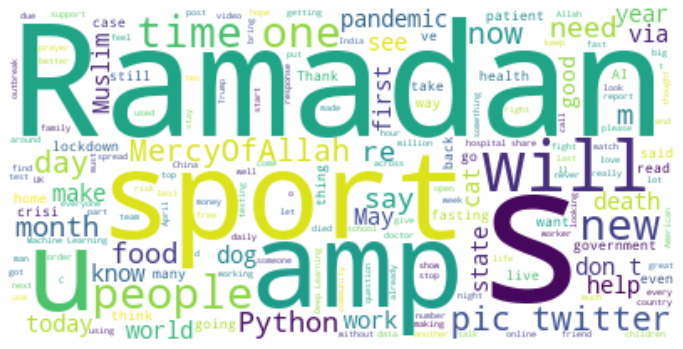

In [54]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display our Word Cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [53]:
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
more_stopwords = [["Ramadan", "people", "sport", "will", "time", "amp", "new", "one", "s", "u"]]
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word.lower() not in stop_words)
    return text
    
df['text'] = df['text'].apply(remove_stopwords)
test['text'] = test['text'].apply(remove_stopwords) 
df.head()

,ID,text,target
0,train_0,bitcoin halving cancelled due,1
1,train_1,mercyofallah good times wrapped granular detai...,0
2,train_2,days digital india murder e learning online ...,1
3,train_3,india likely run remaining rna kits essential ...,1
4,train_4,tough times best way grow learn case teach hel...,0


### stemming

In [54]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text
df['text'] = df['text'].apply(stemm_text)
test['text'] = test['text'].apply(stemm_text)
df.head()

,ID,text,target
0,train_0,bitcoin halv cancel due,1
1,train_1,mercyofallah good time wrap granular detail ch...,0
2,train_2,day digit india murder e learn onlin busi re...,1
3,train_3,india like run remain rna kit essenti test one...,1
4,train_4,tough time best way grow learn case teach help...,0


In [55]:
def preprocess_data(text):
    # Clean puntuation, urls, and so on
    text = clean_text(text)
    # Remove stopwords
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    # Stemm all the words in the sentence
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    
    return text
df['text'] = df['text'].apply(preprocess_data)
test['text'] = test['text'].apply(preprocess_data)
df.head()

,ID,text,target
0,train_0,bitcoin halv cancel due,1
1,train_1,mercyofallah good time wrap granular detail ch...,0
2,train_2,day digit india murder e learn onlin busi re...,1
3,train_3,india like run remain rna kit essenti test one...,1
4,train_4,tough time best way grow learn case teach help...,0


## visualization

In [56]:
df['target'] = df['target'].astype('str')

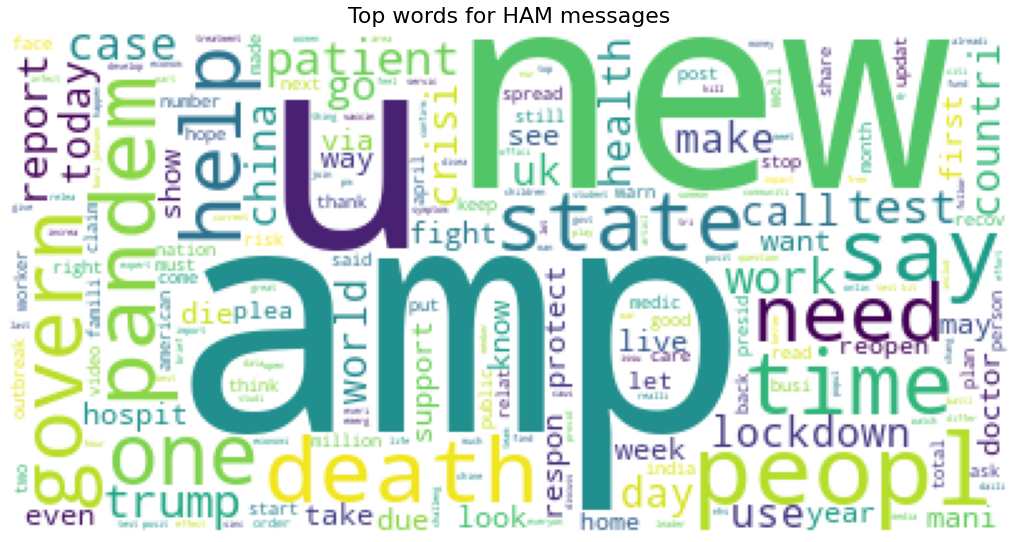

In [37]:
wc = WordCloud(
    background_color='white', 
    max_words=200, 
)
wc.generate(' '.join(text for text in df.loc[df['target'] == '1', 'text']))
plt.figure(figsize=(18,10))
plt.title('Top words for HAM messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

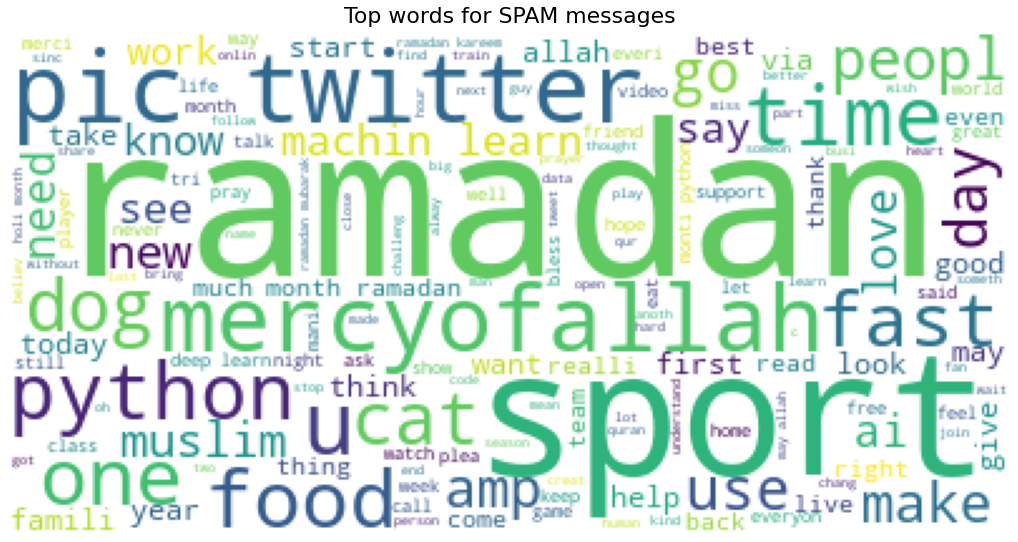

In [39]:
wc = WordCloud(
    background_color='white', 
    max_words=200, 
)
wc.generate(' '.join(text for text in df.loc[df['target'] == '0', 'text']))
plt.figure(figsize=(18,10))
plt.title('Top words for SPAM messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [65]:
df['target'] = df['target'].astype('int64')

# Transforming Tweets

In [59]:
# Import the TfidfVectorizer and default list of English stop words
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Build the vectorizer
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(df.text)

# Create sparse matrix from the vectorizer
X = vect.transform(df.text)
y = vect.transform(test.text)

# Create a DataFrame
reviews_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())
reviews_transformed_test = pd.DataFrame(y.toarray(), columns=vect.get_feature_names_out())
# print('Top 5 rows of the DataFrame: \n', reviews_transformed.head())

# Models

Accuracy score on the test set:  0.8695652173913043
Accuracy on train set:  0.8928824781272169
Accuracy on test set:  0.8695652173913043
[[0.42155009 0.09924386]
 [0.03119093 0.44801512]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


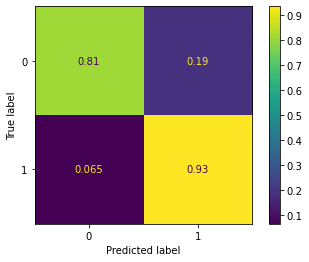

In [87]:
# Define X and y
y = df.target
X = reviews_transformed

# Train/test split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=456)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
print('Accuracy score on the test set: ', accuracy_score(y_test, y_predicted))
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))
print(confusion_matrix(y_test, y_predicted) / len(y_test))
plot_confusion_matrix(log_reg, X_test, y_test,normalize='true')

In [95]:
# We'll use the random forest algorithm to create our classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y = df.target
X = reviews_transformed

# Create arrays for the features and the target: X, y
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

rf = RandomForestClassifier(n_estimators=200, random_state=0)
rf.fit(X_train, y_train)

# Let's obtain our predictions on our test dataset
predictions = rf.predict(X_test)

# Let's display the results of our classifier on our test dataset
print(classification_report(y_test,predictions))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       565
           1       0.84      0.94      0.89       493

    accuracy                           0.89      1058
   macro avg       0.89      0.89      0.89      1058
weighted avg       0.89      0.89      0.89      1058

Accuracy 88.85%


In [79]:
# We'll use the naive_bayes algorithm to create our classifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y = df.target
X = reviews_transformed

# Create arrays for the features and the target: X, y
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

text_classifier = MultinomialNB()
text_classifier.fit(X_train, y_train)

# Let's obtain our predictions on our test dataset
predictions = text_classifier.predict(X_test)

# Let's display the results of our classifier on our test dataset
print(classification_report(y_test,predictions))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       565
           1       0.85      0.82      0.84       493

    accuracy                           0.85      1058
   macro avg       0.85      0.85      0.85      1058
weighted avg       0.85      0.85      0.85      1058

Accuracy 84.97%


In [75]:
import xgboost as xgb

y = df.target
X = reviews_transformed

# Create arrays for the features and the target: X, y
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

xgb = xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc')
xgb.fit(X_train, y_train)

# Let's obtain our predictions on our test dataset
predictions = xgb.predict(X_test)

# Let's display the results of our classifier on our test dataset
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test, predictions)))

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy 88.47%


In [68]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

y = df.target
X = reviews_transformed

# Create arrays for the features and the target: X, y
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic',
                          learning_rate=0.1,
                          max_depth=3,
                          n_estimators=100,
                          random_state=123
                         )
xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("accuracy: %f" % (accuracy))

accuracy: 0.883743


## GloVe - LST

In [105]:
train_tweets = df['text'].values
test_tweets = test['text'].values
train_target = df['target'].values

In [108]:
# Calculate the length of our vocabulary
from keras.preprocessing.text import Tokenizer

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(train_tweets)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

9740

In [109]:
def show_metrics(pred_tag, y_test):
    print("F1-score: ", f1_score(pred_tag, y_test))
    print("Precision: ", precision_score(pred_tag, y_test))
    print("Recall: ", recall_score(pred_tag, y_test))
    print("Acuracy: ", accuracy_score(pred_tag, y_test))
    print("-"*50)
    print(classification_report(pred_tag, y_test))
    
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

In [115]:
from nltk.tokenize import word_tokenize

longest_train = max(train_tweets, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(train_tweets), 
    length_long_sentence, 
    padding='post'
)
test_padded_sentences = pad_sequences(
    embed(test_tweets), 
    length_long_sentence,
    padding='post'
)

train_padded_sentences

array([[3298, 4712,  597, ...,    0,    0,    0],
       [  16,   47,    5, ...,    0,    0,    0],
       [  13,  565,  171, ...,    0,    0,    0],
       ...,
       [ 615, 1289,    4, ...,    0,    0,    0],
       [  22,    6,  420, ...,    0,    0,    0],
       [ 248,  256, 3822, ...,    0,    0,    0]])

In [118]:
# Now we will load embedding vectors of those words that appear in the
# Glove dictionary. Others will be initialized to 0.
embeddings_dictionary = dict()
embedding_dim = 100

embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [119]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences, 
    train_target, 
    test_size=0.25
)

In [121]:
# Model from https://www.kaggle.com/mariapushkareva/nlp-disaster-tweets-with-glove-and-lstm/data

def glove_lstm():
    model = Sequential()
    
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0], 
        output_dim=embedding_matrix.shape[1], 
        weights = [embedding_matrix], 
        input_length=length_long_sentence
    ))
    
    model.add(Bidirectional(LSTM(
        length_long_sentence, 
        return_sequences = True, 
        recurrent_dropout=0.2
    )))
    
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

model = glove_lstm()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 100)           974000    
                                                                 
 bidirectional (Bidirection  (None, 40, 80)            45120     
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 80)                0         
 alMaxPooling1D)                                                 
                                                                 
 batch_normalization (Batch  (None, 80)                320       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                        

In [122]:
# Load the model and train!!

model = glove_lstm()

checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model.fit(
    X_train, 
    y_train, 
    epochs = 7,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/7
124/124 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5137
Epoch 1: val_loss improved from inf to 0.69264, saving model to model.h5
124/124 [==============================] - 26s 128ms/step - loss: 0.6930 - accuracy: 0.5137 - val_loss: 0.6926 - val_accuracy: 0.5257 - lr: 0.0010
Epoch 2/7


C:\Users\HP\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


124/124 [==============================] - ETA: 0s - loss: 0.6928 - accuracy: 0.5173
Epoch 2: val_loss improved from 0.69264 to 0.69237, saving model to model.h5
124/124 [==============================] - 15s 122ms/step - loss: 0.6928 - accuracy: 0.5173 - val_loss: 0.6924 - val_accuracy: 0.5257 - lr: 0.0010
Epoch 3/7
124/124 [==============================] - ETA: 0s - loss: 0.6927 - accuracy: 0.5173
Epoch 3: val_loss improved from 0.69237 to 0.69220, saving model to model.h5
124/124 [==============================] - 16s 126ms/step - loss: 0.6927 - accuracy: 0.5173 - val_loss: 0.6922 - val_accuracy: 0.5257 - lr: 0.0010
Epoch 4/7
124/124 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.5173
Epoch 4: val_loss improved from 0.69220 to 0.69212, saving model to model.h5
124/124 [==============================] - 18s 142ms/step - loss: 0.6926 - accuracy: 0.5173 - val_loss: 0.6921 - val_accuracy: 0.5257 - lr: 0.0010
Epoch 5/7
124/124 [==============================] - 

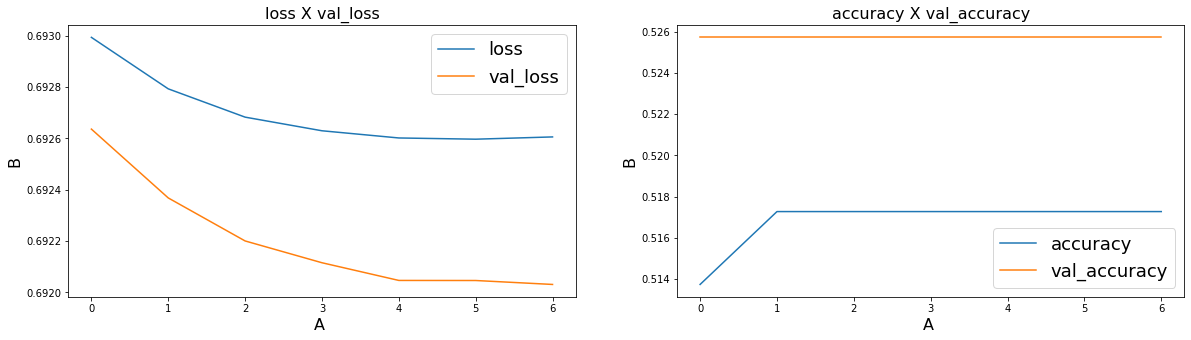

In [131]:
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A ',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)
plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [ ]:
preds = model.predict_classes(X_test)
show_metrics(preds, y_test)

In [132]:
# Assuming model is your Sequential model
# Get raw predictions
raw_preds = model.predict(X_test)

# Extract classes based on highest probability
preds = np.argmax(raw_preds, axis=1)

# Assuming show_metrics is a function you defined elsewhere to show evaluation metrics
show_metrics(preds, y_test)

42/42 [==============================] - 1s 15ms/step
F1-score:  0.0
Precision:  0.0
Recall:  0.0
Acuracy:  0.5257186081694403
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.53      0.69      1322
           1       0.00      0.00      0.00         0

    accuracy                           0.53      1322
   macro avg       0.50      0.26      0.34      1322
weighted avg       1.00      0.53      0.69      1322



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Reca

In [137]:
test['target'] = rf.predict(reviews_transformed_test)

In [138]:
# Create submission DataFrame
submission = pd.DataFrame({"ID": test["ID"],
                           "target": test['target']})
submission.head()

,ID,target
0,test_2,1
1,test_3,0
2,test_4,0
3,test_8,1
4,test_9,0


In [98]:
submission.to_csv('submission_Rff.csv', index=False)